In [2]:
#from datasets import *

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import FirstOrderExpansion
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint

from sklearn import svm

In [3]:
from qiskit import IBMQ
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
IBMQ.load_accounts()
IBMQ.backends()

configrc.store_credentials:WARNING:2020-08-04 02:08:44,535: Credentials already present. Set overwrite=True to overwrite.


AttributeError: 'IBMQFactory' object has no attribute 'load_accounts'

In [4]:
En = np.genfromtxt('En.csv', delimiter = ',', usecols=range(1), unpack = True)
van = np.genfromtxt('van.csv', delimiter = ',', usecols=range(1), unpack = True)
gl = np.genfromtxt('gl.csv', delimiter = ',', usecols=range(81), unpack = True)

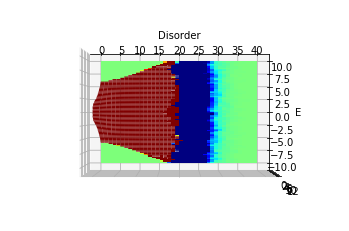

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(van, En)

surf = ax.plot_surface(X, Y, gl, rstride=1, cstride=1, cmap=cm.jet,vmin=-0.000005, vmax=0.000005, antialiased=True)
ax.view_init(azim=-90, elev=90)

ax.set_ylabel('E')
ax.set_xlabel('Disorder')

#Show the plot
plt.show()

In [6]:
def rand(x):
    m = 13093
    b = 5
    a = 6679
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 13093
    b = 5
    ainv = 10425
    return ainv * (y - 1 - b) % m

def rand2(x):
    m = 16141
    b = 5
    a = 5059
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 16141
    b = 5
    ainv = 14115
    return ainv * (y - 1 - b) % m

def modInverse(a, m) : 
    a = a % m; 
    for x in range(1, m) : 
        if ((a * x) % m == 1) : 
            return x 
    return 1

#print(modInverse(5059,16141))

In [7]:
delta = 1E-6;

insulator = []
conductor = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            if (val > 0):
                conductor.append([van[j], En[i]])
            else:
                insulator.append([van[j], En[i]])
                
insulator = np.asarray(insulator)
conductor = np.asarray(conductor)
                
data = []
labels = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            data.append([En[i], van[j]])            
            if (val > 0):
                labels.append(0)
            else:
                labels.append(1)

In [8]:
#Classical, all data

X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9593613933236574


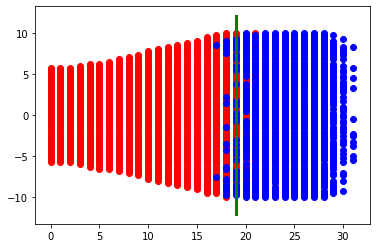

In [9]:
y = np.asarray(labels)
x= np.asarray(data)

X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Plot data points and color using their class
color = ['red' if c == 1 else 'blue' for c in y]
plt.scatter(conductor[:, 0], conductor[:, 1], color = "red")
plt.scatter(insulator[:, 0], insulator[:, 1], color = "blue")

d = np.array(data)
m = max(d[:, 0])

# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
#xx = np.arange(0, m, 10)
xx = np.linspace(-12, 12)
yy = a * xx - (clf.intercept_[0]) / w[1]

yint = -(clf.intercept_[0]) / w[1]
slope = a

# Plot the hyperplane
plt.plot(yy, xx, color = "green", linewidth = 3)
plt.show();

In [10]:
#Classical, all data, random

X_train, x_test, Y_train, y_test = train_test_split(rand(np.asarray(data)), labels, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5166908563134979


In [70]:
#Quantum, all data

insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result0 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result0['testing_accuracy']))

58611.87826132774
testing success ratio: 0.5652173913043478


In [69]:
#Quantum, all data, random

insulator_train, insulator_test = train_test_split(rand(insulator), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result1 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result1['testing_accuracy']))

59013.32870411873
testing success ratio: 0.5101449275362319


In [11]:
#Epsilon is the distance from the classical hyperplane
epsilon = 2.1
conductor_red = []
insulator_red = []

def linedist(x0, y0, a, b, c):
    return np.abs(a*x0+b*y0+c)/np.sqrt(a**2+b**2)

for i in range(0, len(data)):
    d = linedist(data[i][0], data[i][1], slope, -1.0, yint)
    #print(d)
    if d <= epsilon:
        if (labels[i] == 1):
            conductor_red.append(data[i])
        else:
            insulator_red.append(data[i])
                    
conductor_red = np.asarray(conductor_red)
insulator_red = np.asarray(insulator_red)

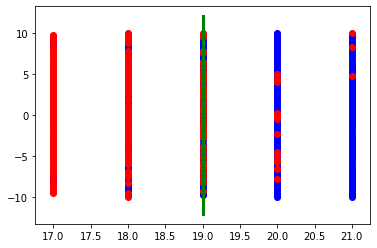

In [12]:
plt.scatter(conductor_red[:, 1], conductor_red[:, 0], color = "blue")
plt.scatter(insulator_red[:, 1], insulator_red[:, 0], color = "red")
plt.plot(yy, xx, color = "green", linewidth = 3)
plt.show();

In [13]:
#Classical, reduced data
data_red = []
labels_red = []

for i in range(0, len(conductor_red)):
    data_red.append(conductor_red[i])
    labels_red.append(0)

for i in range(0, len(insulator_red)):
    data_red.append(insulator_red[i])
    labels_red.append(1)

X_train, x_test, Y_train, y_test = train_test_split(data_red, labels_red, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803030303030303


In [14]:
#Classical, reduced data, random

X_train, x_test, Y_train, y_test = train_test_split(rand(np.asarray(data_red)), labels_red, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4772727272727273


In [71]:
#Quantum, reduced data

insulator_train, insulator_test = train_test_split(insulator_red, test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(conductor_red, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result2 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result2['testing_accuracy']))

2052.7061846256256
testing success ratio: 0.5413533834586466


In [15]:
#Quantum, reduced data, random, real 16 qubit

insulator_train, insulator_test = train_test_split(rand(insulator_red), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor_red), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)


backend = IBMQ.get_backend('ibmq_16_melbourne')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598, skip_qobj_validation=False)

result2 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result2['testing_accuracy']))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The qiskit.aqua.components.feature_maps.SecondOrderExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.ZZFeatureMap instead.
  del sys.path[0]
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\qiskit\aqua\components\feature_maps\second_order_expansion.py:59: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliZExpansion class is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.PauliFeatureMap instead.
  z_order=2, data_map_func=data_map_func)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\qiskit\aqua\components\feature_maps\pauli_z_expansion.py:71: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months

AttributeError: 'IBMQFactory' object has no attribute 'get_backend'

In [22]:
#Quantum, reduced data, random

insulator_train, insulator_test = train_test_split(rand(insulator_red), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor_red), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result3 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result3['testing_accuracy']))

KeyboardInterrupt: 

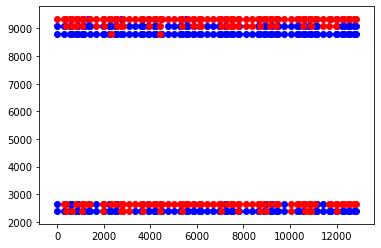

In [15]:
conductor_rand = rand(conductor_red)
insulator_rand = rand(insulator_red)

plt.scatter(insulator_rand[:, 0], insulator_rand[:, 1], color = "blue")
plt.scatter(conductor_rand[:, 0], conductor_rand[:, 1], color = "red")
plt.show();